In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import os
from pathlib import Path

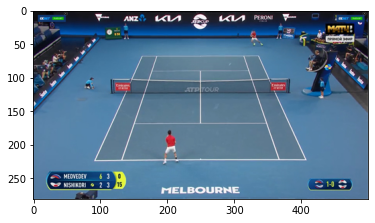

In [2]:
img_path = os.path.join(Path().resolve(), '..', 'assets', 'images', 'tennis', 'tennis_sample.jpg')
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



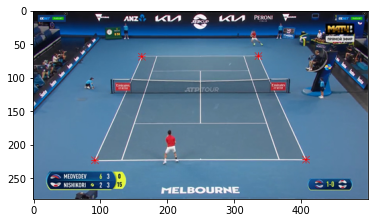

In [3]:
# 各頂点の座標(mm)
bottom_left = (92, 223)
bottom_right = (407, 222)
top_left = (162, 69)
top_right = (336, 68)

img_added_point = img.copy()
for point in [bottom_left, bottom_right, top_right, top_left]:
    cv2.drawMarker(img_added_point, point, (0, 0, 255), markerType=cv2.MARKER_STAR, markerSize=10)
plt.imshow(cv2.cvtColor(img_added_point, cv2.COLOR_BGR2RGB))
plt.show()


In [4]:
# m単位の10倍
horizontal_m_x10 = 10.970 * 10
vertical_m_x10 = 23.770 * 10

tennis_cort_corners_meter = np.array([(0., 0.), (horizontal_m_x10, 0.), (horizontal_m_x10, vertical_m_x10), (0., vertical_m_x10)])
tennis_cort_corners_in_img = np.array([bottom_left, bottom_right, top_right, top_left])
[(meter, img_point) for meter, img_point in zip(tennis_cort_corners_meter.tolist(), tennis_cort_corners_in_img.tolist())]

[([0.0, 0.0], [92, 223]),
 ([109.7, 0.0], [407, 222]),
 ([109.7, 237.7], [336, 68]),
 ([0.0, 237.7], [162, 69])]

In [5]:
import sport_analysis as sp
print(sp.HomograpyTransformer)

<class 'sport_analysis._homography.HomograpyTransformer'>


In [6]:
import inspect
# 特殊メソッド以外のメソッドを一覧表示
[method_  for method_ in inspect.getmembers(sp.HomograpyTransformer) if "_" != method_[0][0] ]

[('inversed_matrix', <property at 0x7fa719da2c20>),
 ('matrix', <property at 0x7fa719da2e00>),
 ('warp_to_dst_img',
  <function sport_analysis._homography.HomograpyTransformer.warp_to_dst_img(self, src_img: numpy.ndarray, dst_img_size_hw: Tuple[int, int], warp_perspective_kwargs: Dict[str, Any] = {}) -> numpy.ndarray>),
 ('warp_to_dst_pt',
  <function sport_analysis._homography.HomograpyTransformer.warp_to_dst_pt(self, src_pt: numpy.ndarray) -> numpy.ndarray>),
 ('warp_to_dst_pts',
  <function sport_analysis._homography.HomograpyTransformer.warp_to_dst_pts(self, src_pts: numpy.ndarray) -> numpy.ndarray>),
 ('warp_to_src_img',
  <function sport_analysis._homography.HomograpyTransformer.warp_to_src_img(self, dst_img: numpy.ndarray, src_img_size: Tuple[int, int], warp_perspective_kwargs: Dict[str, Any] = {}) -> numpy.ndarray>),
 ('warp_to_src_pt',
  <function sport_analysis._homography.HomograpyTransformer.warp_to_src_pt(self, dst_pt: numpy.ndarray) -> numpy.ndarray>),
 ('warp_to_src_pts'

In [7]:
# ホモグラフィ行列を含む変換クラスのインスタンス生成
transformer = sp.HomograpyTransformer(tennis_cort_corners_in_img, tennis_cort_corners_meter)
# ホモグラフィ行列とその逆行列
transformer

Homograpy matrix: [[ 1.00820413e+00  4.58274605e-01 -1.94950017e+02]
 [-7.80401016e-03 -2.45826320e+00  5.48910662e+02]
 [ 7.47671267e-05  8.38026066e-03  1.00000000e+00]] 
Inversed homograpy matrix: [[ 9.91765430e-01  2.93949869e-01  3.19924698e+01]
 [-6.86318567e-03 -1.43711807e-01  7.75469648e+01]
 [-1.66361667e-05  1.18236461e-03  3.47744237e-01]] 

In [8]:
# コートの画像を変換
world_coat = transformer.warp_to_dst_img(img[:, :, 1], (int(vertical_m_x10), int(horizontal_m_x10)))
world_coat.shape
world_coat = cv2.warpPerspective(np.float32(img), transformer.matrix, (int(horizontal_m_x10), int(vertical_m_x10))) / 255

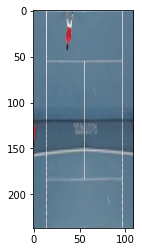

In [9]:
plt.imshow(cv2.cvtColor(world_coat, cv2.COLOR_BGR2RGB))
plt.show()

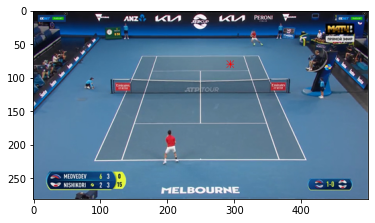

In [10]:
# 画像上のボールの位置
ball_position = (294, 80)
img_ball = img.copy()
cv2.drawMarker(img_ball, ball_position, (0, 0, 255), markerType=cv2.MARKER_STAR, markerSize=10)
plt.imshow(cv2.cvtColor(img_ball, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
# コート上の座標に変換
ball_position_coat_meter = transformer.warp_to_dst_pt(np.array(ball_position))
ball_position_coat_meter

array([ 81.61414, 206.78015], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


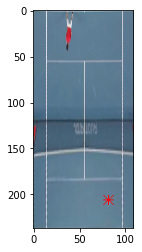

In [12]:
# ボールを重畳
world_coat_ball = world_coat.copy()
cv2.drawMarker(world_coat_ball, tuple([int(i) for i in ball_position_coat_meter.tolist()]), (0, 0, 255), markerType=cv2.MARKER_STAR, markerSize=10)
plt.imshow(cv2.cvtColor(world_coat_ball, cv2.COLOR_BGR2RGB))

In [13]:
# コートの中心座標の点を元画像に戻す
center_position = (horizontal_m_x10/2, vertical_m_x10/2)
center_position

(54.85, 118.85)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


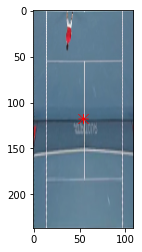

In [14]:
# コート座標で表示
world_coat_center = world_coat.copy()
cv2.drawMarker(world_coat_center, tuple([int(i) for i in center_position]), (0, 0, 255), markerType=cv2.MARKER_STAR, markerSize=10)
plt.imshow(cv2.cvtColor(world_coat_center, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# 元画像上の点に変換する
center_position_on_img = transformer.warp_to_src_pt(np.array(center_position))
center_position_on_img

array([248.94902 , 123.298775], dtype=float32)

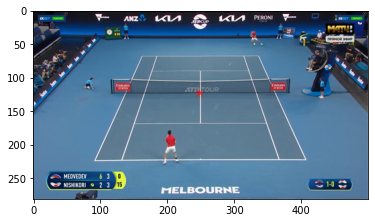

In [16]:
img_center = img.copy()
cv2.drawMarker(img_center, tuple([int(i) for i in center_position_on_img.tolist()]), (0, 0, 255), markerType=cv2.MARKER_STAR, markerSize=10)
plt.imshow(cv2.cvtColor(img_center, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 複数の点を同時に座標系変換も可能
point_list = np.array([[0.0, 0.0], [10.0, 10.0], [20.0, 40.0], [50.0, 60.0]])
transformer.warp_to_dst_pts(point_list)